### Práctica ANN-0:

Modifique el código anterior, a fin de usar [Hot Encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) y contar con 2 salidas en lugar de 1.

In [6]:
import numpy as np
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

%matplotlib inline

x=np.array([[0,0],[0,1],[1,0],[1,1]])
d=np.array([0,1,1,0])
entradas = 2
neuronas_capa_oculta = 4
neuronas_capa_salida = 2
# TODO:
# Modificar las salidas deseadas para representarlas con 2 valores binarios


# Modoficar los parametros de la Red Neuronal. Sustituir None por el valor correspondiente
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento con la nueva representacion de la salida. 
# Sustituir None por el valor correspondiente:

# TODO:

mlp.fit(x,d)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=False, warm_start=False)
Pesos W^(0): 
: [[ 4.49835102e+00  5.19298546e-03  4.49637090e+00  8.60635745e-04]
 [-4.49833478e+00 -1.49272926e-02 -4.49739984e+00  1.12348572e-02]]

Pesos W^(1): 
: [[ 5.25836736e+00 -5.25881682e+00]
 [-1.94663891e-02  8.32847674e-03]
 [-5.25890870e+00  5.26149743e+00]
 [ 3.32199081e-03  4.73619820e-04]]

Prueba con { 0|0 } =>  [0]

Prueba con { 0|1 } =>  [1]

Prueba con { 1|0 } =>  [1]

Prueba con { 1|1 } =>  [0]


### Práctica ANN-1:

Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$. Con estos puntos, deberá realizar las siguientes tareas:

* Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
* Entrenar la red hasta lograr un error mínimo.
* Probar la red y presentar la matriz de [confusión](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
* Indicar el nivel de [precisión](https://en.wikipedia.org/wiki/Precision_and_recall) (muestras correctamente clasificadas frente al total de muestras):

$precision=\frac{muestras ~~correctamente ~~clasificadas}{total~~ de~~ muestras}$

In [5]:
import random
import numpy as np
import matplotlib.pyplot as pp
x1=np.array([[random.uniform(-25,25),random.uniform(-25,25)]])
i=1
j=1
while i<=999:
    x1=np.append(x1,[[random.uniform(-25,25),random.uniform(-25,25)]],axis=0)
    i+=1
x2=np.array([random.choice(x1)])
while j<=799:
    x2=np.append(x2,[random.choice(x1)],axis=0)
    j+=1
x=np.arange(1.,231.,0.23)
rv=np.random.uniform(0.,1.,size=len(x))

mul=np.random.uniform(1.,4.7,size=len(x))

salidas=np.array([random.choice((-1.,1.)) for i in range(len(x))])
print(salidas.size)



1000


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train: 0.803, Test: 0.840


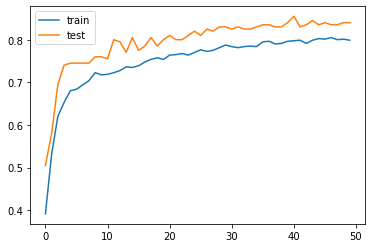

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
%matplotlib inline
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = int(0.8 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()